In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
actual_df  = pd.read_csv('성별_전체_추계인구_유소년노년_24_72.csv', encoding='euc-kr')
results_df    = pd.read_csv('LSTM결과.csv', encoding='euc-kr' )

C:\Users\felic\AppData\Local\Temp\ipykernel_10980\1920140764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_elderly_df.rename(columns={'Year': '연도', '노년': '노년_LSTM'}, inplace=True)


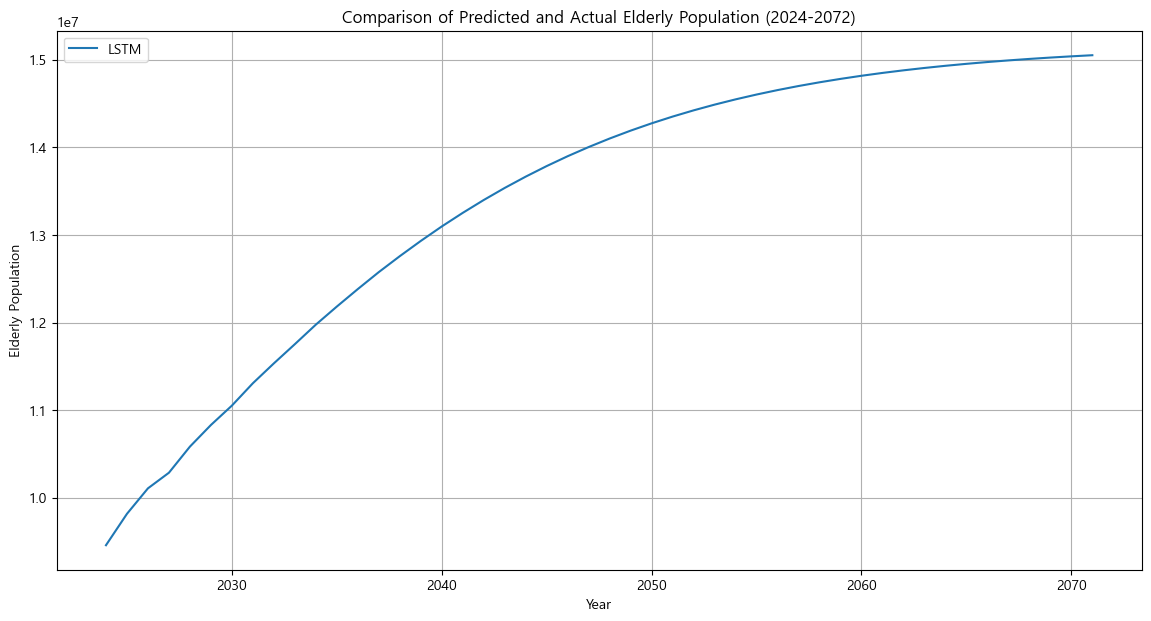

In [3]:
# '연령별'이 '노년'인 행만 추출
actual_elderly_df = actual_df[actual_df['연령별'] == '노년']

# 'Year'와 '노년' 열만 선택
results_elderly_df = results_df[['Year', '노년']]

# 'Year' 열 이름을 '연도'로 변경
results_elderly_df.rename(columns={'Year': '연도', '노년': '노년_LSTM'}, inplace=True)

# 'actual_elderly_df'를 연도로 melt
actual_elderly_df = actual_elderly_df.melt(id_vars=['성별', '연령별'], var_name='연도', value_name='노년_Actual')
actual_elderly_df['연도'] = actual_elderly_df['연도'].astype(int)

# '성별'이 '전체'인 행만 추출
actual_elderly_df = actual_elderly_df[actual_elderly_df['성별'] == '전체']

# 2024년부터 2072년까지의 데이터를 필터링
results_filtered = results_elderly_df[(results_elderly_df['연도'] >= 2024) & (results_elderly_df['연도'] <= 2072)]
actual_filtered = actual_elderly_df[(actual_elderly_df['연도'] >= 2024) & (actual_elderly_df['연도'] <= 2072)]

# 데이터프레임 병합
comparison_df = pd.merge(results_filtered, actual_filtered, on='연도')

# 비교할 열 선택
comparison_table = comparison_df[['연도', '노년_LSTM', '노년_Actual']]

# 데이터 시각화
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(14, 7))
sns.lineplot(data=comparison_table, x='연도', y='노년_LSTM', label='LSTM')
#sns.lineplot(data=comparison_table, x='연도', y='노년_Actual', label='KOSIS')
plt.title('Comparison of Predicted and Actual Elderly Population (2024-2072)')
plt.xlabel('Year')
plt.ylabel('Elderly Population')
plt.legend()
plt.grid(True)
plt.show()